# Observations from Pymaceuticals Data:

    1. Since they have the lowest final tumor volumes and the highest survival rates among all the treatments, Capomulin and Ramicane are the most effective treatments for reducing tumor volume in mice.

    2. There is a strong positive correlation between mouse weight and tumor volume for mice treated with Capomulin. This suggests that mouse weight should be taken into consideration when determining the efficacy of Capomulin treatment.
    
    3. The metastatic spread of cancer in mice treated with Capomulin and Ramicane is significantly lower than other treatments, indicating that these drugs may not only be effective at reducing tumor volume but also in preventing the spread of cancer.

In [23]:
# Libraries setup
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from pathlib import Path

#study data files setup
mouse_metadata_path = Path("Resources/mouse_metadata.csv")
study_results_path = Path("Resources/study_results.csv")

#to read csv files
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#combining data to form dataframe
mouse_data_df = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID", "Mouse ID"])

In [24]:
unique_mouse_ids = pd.Series(mouse_data_df['Mouse ID']).nunique()
unique_mouse_ids

249

In [25]:
duplicate_mouse_ids = mouse_data_df[mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
if len(duplicate_mouse_ids) > 0:
    print("Mouse ID(s) with duplicate time points:")
    print(duplicate_mouse_ids)
    # Display the data associated with that mouse ID
    print("Data associated with duplicate mouse ID(s):")
    print(mouse_data_df[mouse_data_df["Mouse ID"].isin(duplicate_mouse_ids)])

Mouse ID(s) with duplicate time points:
['g989']
Data associated with duplicate mouse ID(s):
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          

In [26]:
# Create a new DataFrame where this data is removed
clean_study_results = mouse_data_df[~mouse_data_df["Mouse ID"].isin(duplicate_mouse_ids)]
clean_study_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [27]:
unique_mouse_ids = pd.Series(clean_study_results['Mouse ID']).nunique()
unique_mouse_ids

248

In [28]:
# Grouping the clean study results DF by Drug Regimen
regimen_groups = clean_study_results.groupby('Drug Regimen')

# Calculate summary statistics for regimen using agg()
summary_stats = regimen_groups.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

#renaming columns
# Rename columns to be more descriptive
summary_stats.columns = ["Mean Tumor Volume", "Median Tumor Volume", "Tumor Volume Variance", 
                         "Tumor Volume Std. Dev.", "Tumor Volume Std. Err."]

# Sort the summary statistics DataFrame by Mean Tumor Volume in descending order
summary_stats_df = pd.DataFrame(summary_stats.sort_values("Mean Tumor Volume", ascending=False))

# Display the summary statistics DataFrame
print(summary_stats_df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Stelasyn              54.233149            52.431737              59.450562   
Placebo               54.033581            52.288934              61.168083   
Zoniferol             53.236507            51.818479              48.533355   
Infubinol             52.884795            51.820584              43.128684   
Ceftamin              52.591172            51.776157              39.290177   
Propriva              52.320930            50.446266              43.852013   
Capomulin             40.675741            41.557809              24.947764   
Ramicane              40.216745            40.673236              23.486704   

              Tumor Volume Std. Dev.  Tumor Volume 

<Axes: title={'center': 'Total Rows by Drug Regimen'}>

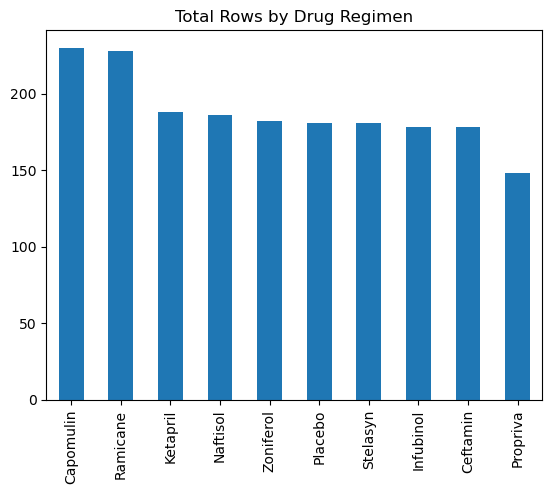

In [29]:
# calculate the total number of rows for each drug regimen
regimen_counts = clean_study_results["Drug Regimen"].value_counts()

# create bar chart with Pandas DataFrame.plot() method
regimen_counts.plot(kind="bar", title="Total Rows by Drug Regimen")


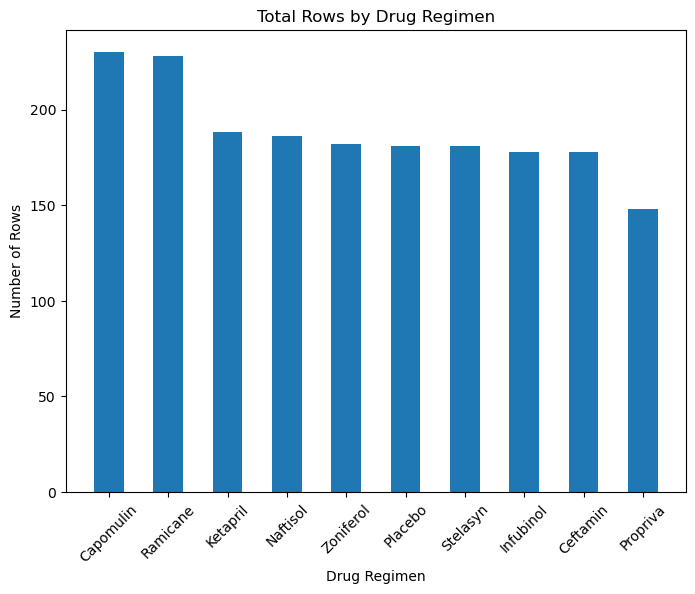

In [30]:
# create bar chart with Matplotlib's pyplot methods
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(regimen_counts.index, regimen_counts.values, width=0.5)
ax.set_title("Total Rows by Drug Regimen")
ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Number of Rows")
ax.tick_params(axis='x', rotation=45)
plt.show()

<Axes: title={'center': 'Mice Distribution by Gender'}, ylabel='Sex'>

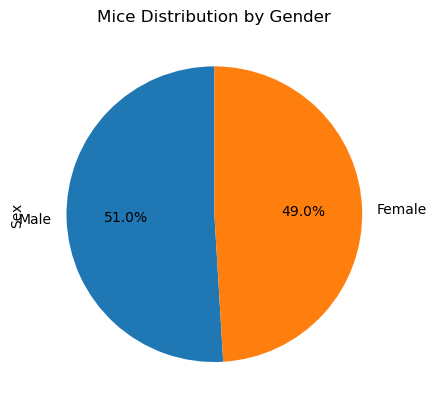

In [31]:
# Count the number of female and male mice
gender_counts = clean_study_results["Sex"].value_counts()

# Create a pie chart with Pandas plot() method
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, title="Mice Distribution by Gender")


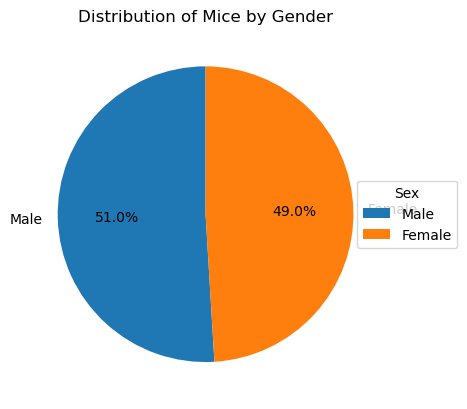

In [32]:
# Count the number of female and male mice
gender_counts = clean_study_results["Sex"].value_counts()

# Create a figure with a single subplot
fig, ax = plt.subplots()

# Create a pie chart using Matplotlib's pie() function
ax.pie(gender_counts.values, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)

# Add a title to the plot
ax.set_title("Distribution of Mice by Gender")

# Add a legend
ax.legend(title="Sex", loc="center right", bbox_to_anchor=(1.2, 0.5))


In [33]:
# Create a grouped DataFrame that shows the last (greatest) time point for each mouse
max_timepoint = clean_study_results.groupby("Mouse ID")["Timepoint"].max()
max_timepoint_df = pd.DataFrame(max_timepoint)

# Merge the max_timepoint_df with the cleaned DataFrame to get the final tumor volume for each mouse
merged_df = pd.merge(max_timepoint_df, clean_study_results, on=["Mouse ID", "Timepoint"], how="left")

# Create a list of treatment names
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create an empty list to hold tumor volume data
tumor_volumes = []

# Loop through each drug in the treatment list
for drug in treatments:
    # Locate the rows in the merged DataFrame that correspond to each treatment
    treatment_df = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    # Append the resulting final tumor volumes for each drug to the empty list
    tumor_volumes.append(treatment_df)

# Calculate the quartiles and IQR for each treatment regimen
for i in range(len(treatments)):
    quartiles = tumor_volumes[i].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    # Determine the upper and lower bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    # Check for potential outliers
    outliers = tumor_volumes[i][(tumor_volumes[i] < lower_bound) | (tumor_volumes[i] > upper_bound)]
    print(f"{treatments[i]} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


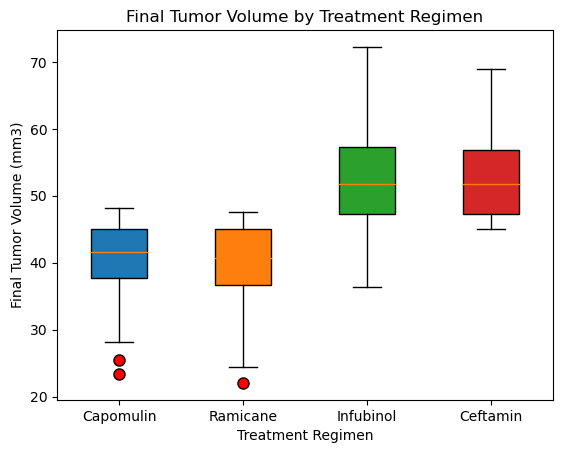

In [34]:
# Create a list of the four treatment regimens to plot
df = clean_study_results
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list of final tumor volume data for each regimen
tumor_vol_data = [df.loc[df['Drug Regimen'] == tr, 'Tumor Volume (mm3)'].values for tr in treatments]

# Set up the plot
fig, ax = plt.subplots()

# Add labels and titles
ax.set_title('Final Tumor Volume by Treatment Regimen')
ax.set_xlabel('Treatment Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')

# Create a boxplot and set outlier color and marker style
boxplot = ax.boxplot(tumor_vol_data, labels=treatments, patch_artist=True, showfliers=True, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Set the fill color of the boxes
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

# Show the plot
plt.show()


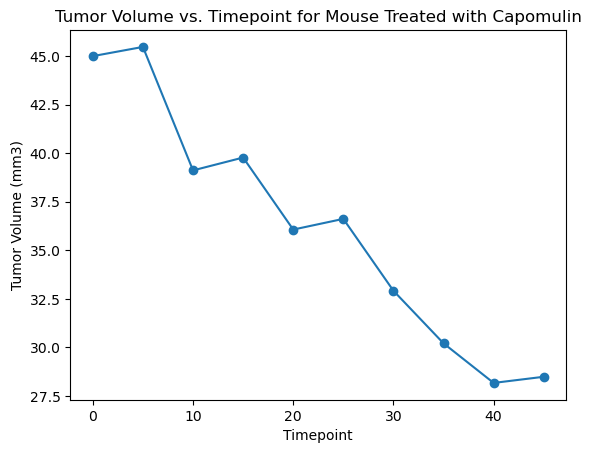

In [35]:
# select mouse treated with Capomulin
Capomulin_mouse_df = mouse_metadata.loc[mouse_metadata["Drug Regimen"] == "Capomulin"]
mouse_id = "x401"
capomulin_data = df.loc[(df['Drug Regimen'] == 'Capomulin') & (df['Mouse ID'] == mouse_id), ['Weight (g)', 'Timepoint', 'Tumor Volume (mm3)']]

# Get the tumor volume data for the selected mouse
tumor_volumes = capomulin_data['Tumor Volume (mm3)']

# Create a line plot
plt.plot(capomulin_data['Timepoint'], tumor_volumes, marker='o')

# Add axis labels and title
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint for Mouse Treated with Capomulin')

# Show the plot
plt.show()


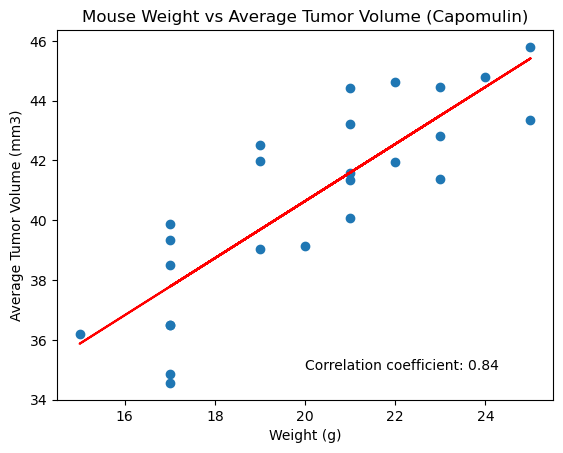

In [36]:
# Filter the data to include only mice treated with Capomulin
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume and weight for each mouse
capomulin_mouse_data = capomulin_data.groupby('Mouse ID')[['Weight (g)', 'Tumor Volume (mm3)']].mean(numeric_only=True)

# Calculate the correlation coefficient between weight and tumor volume
correlation = round(st.pearsonr(capomulin_mouse_data['Weight (g)'], capomulin_mouse_data['Tumor Volume (mm3)'])[0], 2)

# Calculate the linear regression model between weight and tumor volume
slope, intercept, rvalue, pvalue, stderr = st.linregress(capomulin_mouse_data['Weight (g)'], capomulin_mouse_data['Tumor Volume (mm3)'])
regress_values = slope * capomulin_mouse_data['Weight (g)'] + intercept

# Create a scatter plot of weight vs tumor volume
plt.scatter(capomulin_mouse_data['Weight (g)'], capomulin_mouse_data['Tumor Volume (mm3)'])

# Plot the linear regression model on top of the scatter plot
plt.plot(capomulin_mouse_data['Weight (g)'], regress_values, color='red')

# Add axis labels, title, and text for the correlation coefficient
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Volume (Capomulin)')
plt.text(20, 35, f"Correlation coefficient: {correlation}")

# Show the plot
plt.show()